In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-penjualan-zara/zara.csv


# **Lead and Check the dataset:**

In [116]:
df = pd.read_csv("/kaggle/input/data-penjualan-zara/zara.csv", sep = ';')
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


## **Variable Description:**

1. **Product ID:** Unique identifier for each product.
2. **Product Position:** The position of the product in the catalog or store layout.
3. **Promotion:** Indicator of whether the product is currently on promotion or not.
4. **Product Category:** The category of the product, such as clothing, accessories, shoes, etc.
5. **Seasonal:** Indicator of whether the product is part of a specific seasonal collection.
6. **Sales Volume:** The quantity of products sold.
7. **Brand:** Brand of the product.
8. **URL:** Product URL (e.g., if the product is sold online).
9. **SKU:** Stock Keeping Unit, a unique code used to identify items available for sale.
10. **Name:** Name of the product.
11. **Description:** Description of the product.
12. **Price:** Price of the product.
13. **Currency:** Currency of the product price.
14. **Scraped_at:** The time when the data was scraped (e.g., in web scraping process).
15. **Terms:** Terms or conditions of the product.
16. **Section:** Section or category where the product is sold in the store (e.g., women's clothing, men's clothing, children's clothing, etc.).

# **Data Exploration:**

## **1. Univariate :**
* #### Univariate analysis explores each variable in a data set, separately.


### **1)- A general look at the data:**

#### In this step we going to:
1. Take a look at the list of columns in the Dataset
2. See shape of the dataset "the number of rows and columns"
3. Check the variable type of each column
4. Check for null values
5. Check for duplicate records

In [117]:
# Let's take a look at the list of the DataFrame columns:
df.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name',
       'description', 'price', 'currency', 'scraped_at', 'terms', 'section'],
      dtype='object')

In [118]:
# To see the number of rows and number of columns:
df.shape

(252, 16)

In [119]:
# To see the variable type of each column:
df.dtypes

Product ID            int64
Product Position     object
Promotion            object
Product Category     object
Seasonal             object
Sales Volume          int64
brand                object
url                  object
sku                  object
name                 object
description          object
price               float64
currency             object
scraped_at           object
terms                object
section              object
dtype: object

In [120]:
# To check for null values:
df.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [121]:
df.duplicated().sum()

0

**Take away:**

* The dataset contains 252 rows and 16 columns
* There are no duplicate records 
* For "name" and "description", we detect the existence of missing values

### **2)- Explore columns with quantitative (numerical) data:**

#### In this step we going to explore numerical variables using :
1. **Descriptive statistics**
2. **Histogram** to see the distribution 
3. **Boxplot** to see if there are some outliers

**Note:** Looking at the data's columns and their types, we see that only **'Price'** and **'Sales Volume'** are truly numerical. While **'Product ID'** contains numbers, it serves as a unique identifier for each product and shouldn't be treated as numerical data for analysis.

In [122]:
# It Generates descriptive statistics for numerical values:
df[["price", "Sales Volume"]].describe()

,price,Sales Volume
count,252.000000,252.000000
mean,86.252540,1823.702381
std,52.083205,697.703748
min,7.990000,529.000000
25%,49.900000,1243.000000
50%,79.900000,1839.500000
75%,109.000000,2398.750000
max,439.000000,2989.000000


*  **Let's see the distribution of "Price" & "Sales Volume".**

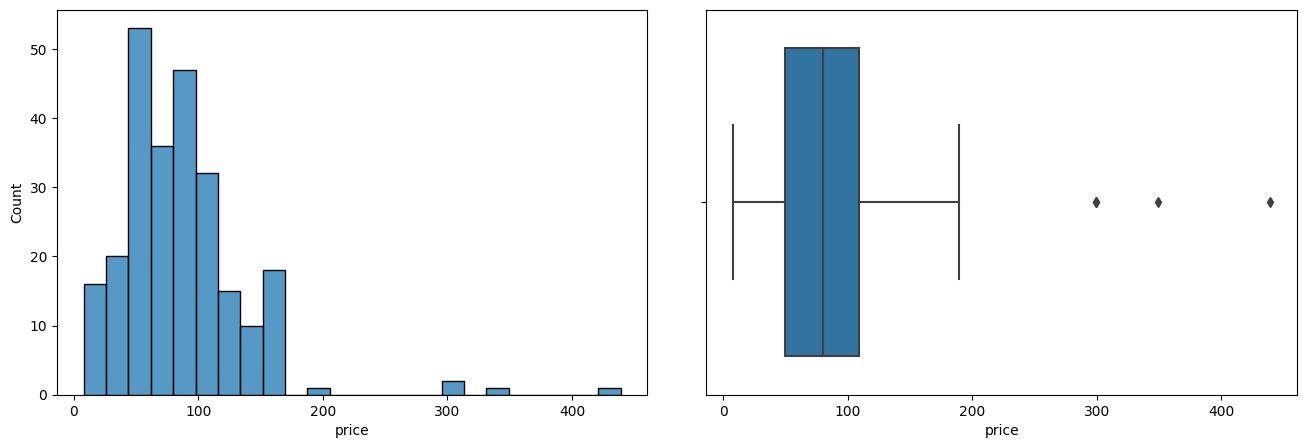

In [123]:
# Price:
fig, axs = plt.subplots(1,2,figsize=(16,5), gridspec_kw={'wspace': 0.1})
sns.histplot(df['price'], ax = axs[0])
sns.boxplot(x = df['price'], ax = axs[1])
plt.show() 

* **Let's identify potential outliers in the data using the interquartile range (IQR) method**

In [124]:

Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
lower_extreme = Q1 - 1.5*IQR
upper_extreme = Q3 + 1.5*IQR
########
#Rows that contain outliers uing the interquartile range (IQR) method:
outlier_price = df[(df.price < lower_extreme)|(df.price > upper_extreme)]
print("the shape is:" ,outlier_price.shape)
print("-" * 20)
outlier_price.head(11)

the shape is: (4, 16)
--------------------


,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
13,151396,Front of Store,Yes,Clothing,Yes,729,Zara,https://www.zara.com/us/en/cropped-leather-jac...,323134418-800-3,CROPPED LEATHER JACKET,Leather jacket. Cropped length. Lapel collar a...,439.0,USD,2024-02-19T08:50:13.771115,jackets,MAN
22,161909,Aisle,Yes,Clothing,No,1290,Zara,https://www.zara.com/us/en/leather-jacket-p054...,315529534-705-3,LEATHER JACKET,Relaxed fit jacket in leather. Spread collar a...,299.0,USD,2024-02-19T08:50:18.813979,jackets,MAN
38,114877,Aisle,No,Clothing,No,1860,Zara,https://www.zara.com/us/en/suede-jacket-p02521...,323134415-700-3,SUEDE JACKET,Jacket made of suede. Cropped length. Lapel co...,349.0,USD,2024-02-19T08:50:29.497634,jackets,MAN
60,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,NaN,299.0,USD,2024-02-19T08:50:43.543555,jackets,MAN


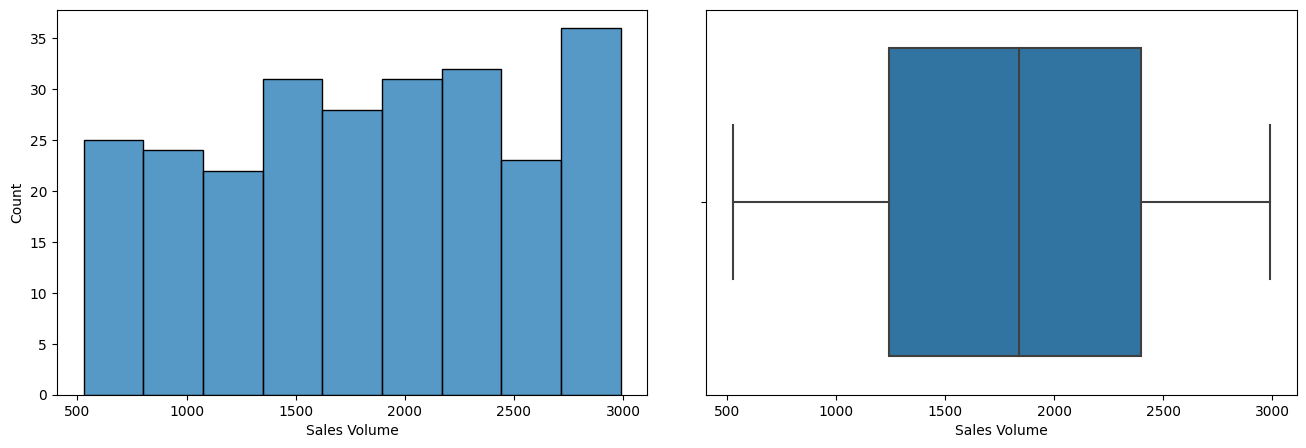

In [125]:
# Sales Volume:
fig, axs = plt.subplots(1,2,figsize=(16,5), gridspec_kw={'wspace': 0.1})
sns.histplot(df['Sales Volume'], ax = axs[0])
sns.boxplot(x = df['Sales Volume'], ax = axs[1])
plt.show()

**Take away:**
* For the price we can see that most prices are less than 100 $
* For the column "Sales Volume" we can see that the histogram shown a distribution mostly like the uniform distribution, which means that every possible sales volume within the observed range has an equal chance of occurring. This means there's no inherent bias towards selling more or fewer units within that range 

### **3)- Explore columns with qualitative (categorical) data:**

#### Now it's time to explore non numerical (qualitative) variables :

In [126]:
df.describe(include = "O")

,Product Position,Promotion,Product Category,Seasonal,brand,url,sku,name,description,currency,scraped_at,terms,section
count,252,252,252,252,252,252,252,251,250,252,252,252,252
unique,3,2,1,2,1,228,228,194,221,1,229,5,2
top,Aisle,No,Clothing,Yes,Zara,https://www.zara.com/us/en/oversized-knit-swea...,318209963-800-2,PLAID OVERSHIRT,Varsity jacket with elastic collar and long sl...,USD,2024-02-19T09:10:39.415761,jackets,MAN
freq,97,132,252,128,252,2,2,6,4,252,2,140,218


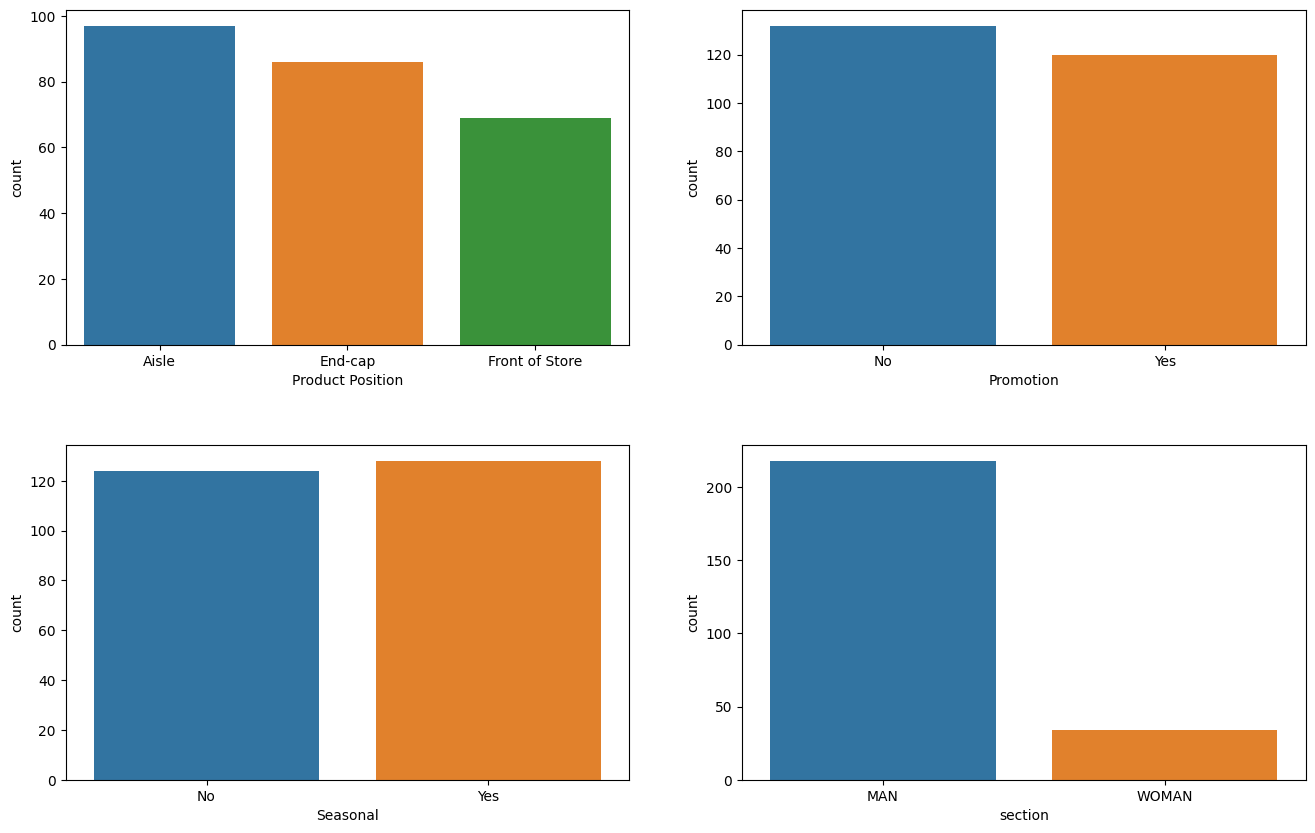

In [127]:
fig, axs = plt.subplots(2, 2, figsize=(16,10), gridspec_kw={'hspace': 0.3, 'wspace': 0.2})
sns.countplot(x = 'Product Position', data = df, ax = axs[0,0] );
sns.countplot(x = 'Promotion',data = df, ax = axs[0,1] );
sns.countplot(x = 'Seasonal',data = df, ax = axs[1,0] );
sns.countplot(x = 'section',data = df ,ax = axs[1,1] );

<Axes: xlabel='terms', ylabel='count'>

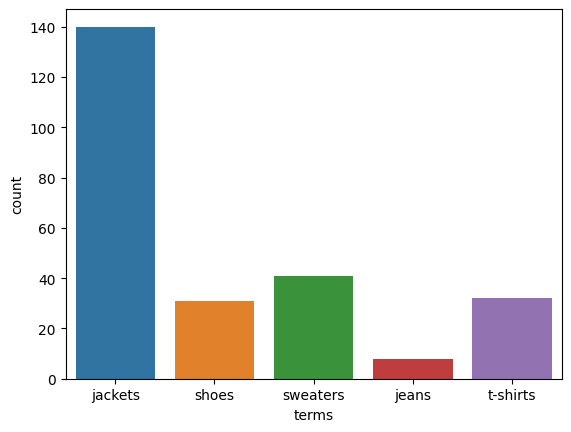

In [128]:
sns.countplot(x = 'terms',data = df)

## **2. Bivariate:**
* #### Bivariate analysis refers to the analysis of two variables to determine relationships between them.

#### In this step, we will explore the relationships between the variables, particularly focusing on qualitative variables. We'll see the relationships between:
* Promotion and Seasonal
* Promotion and terms
* Promotion and section
* Promotion and Product Position
* Product Position and section
* Position and terms

### **1)- Promotion vs Seasonal:**

In [129]:
from scipy.stats import chi2_contingency

In [130]:
observed = pd.crosstab(df['Promotion'], df['Seasonal'])
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(observed)
# Print the results:
print("Chi-squared test results:")
print("Chi-squared value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared test results:
Chi-squared value: 0.0
P-value: 1.0
Degrees of freedom: 1
Expected frequencies:
 [[64.95238095 67.04761905]
 [59.04761905 60.95238095]]


* #### Conclusion:
* Chi-squared value : 0.0
* P-value : 1.0 > 0.05
> The results of the chi-squared test do not allow us to conclude that there is a relationship between product position and seasonality. In other words, the position of the product in the catalog or the store layout does not depend on whether it is part of a seasonal collection.

### **2)- Promotion vs Terms:**

In [131]:
observed_2 = pd.crosstab(df['Promotion'], df['terms'])
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(observed_2)
# Print the results:
print("Chi-squared test results:")
print("Chi-squared value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-squared test results:
Chi-squared value: 0.8117119215363703
P-value: 0.9368710570637869
Degrees of freedom: 4
Expected frequencies:
 [[73.33333333  4.19047619 16.23809524 21.47619048 16.76190476]
 [66.66666667  3.80952381 14.76190476 19.52380952 15.23809524]]


* #### Conclusion:
* Chi-squared value : 0.8117
* P-value : 0.93687 > 0.05
> The position of the product in the catalog or the store layout does not depend on terms or conditions of the product.

### **3)- Promotion vs section:**

In [132]:
observed_3 = pd.crosstab(df['Promotion'], df['section'])
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(observed_3)
# Print the results:
print("Chi-squared test results:")
print("Chi-squared value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared test results:
Chi-squared value: 0.013058676347937063
P-value: 0.9090201440961022
Degrees of freedom: 1
Expected frequencies:
 [[114.19047619  17.80952381]
 [103.80952381  16.19047619]]


* #### Conclusion:
* Chi-squared value : 0.0130
* P-value : 0.9090 > 0.05
> The data does not allow us to conclude that the position of the product in the catalog or the store layout is influenced by the section where it is sold.

### **4)- Promotion vs Product Position:**

In [133]:
observed_4 = pd.crosstab(df['Promotion'], df['Product Position'])
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(observed_4)
# Print the results:
print("Chi-squared test results:")
print("Chi-squared value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared test results:
Chi-squared value: 0.09535006912968617
P-value: 0.9534435729455086
Degrees of freedom: 2
Expected frequencies:
 [[50.80952381 45.04761905 36.14285714]
 [46.19047619 40.95238095 32.85714286]]


* #### Conclusion:
* Chi-squared value : 0.095
* P-value : 0.9534 > 0.05
> The results of the chi-squared test do not allow us to conclude that there is a relationship between product position and promotion. In other words the position of the product in the catalog or the store layout does not appear to depend on whether the product is currently on promotion or not.

### **5)- Product Position vs Section:**

In [134]:
observed_5 = pd.crosstab(df['Product Position'], df['section'])
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(observed_5)
# Print the results:
print("Chi-squared test results:")
print("Chi-squared value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared test results:
Chi-squared value: 1.3911052859797146
P-value: 0.49879871418823285
Degrees of freedom: 2
Expected frequencies:
 [[83.91269841 13.08730159]
 [74.3968254  11.6031746 ]
 [59.69047619  9.30952381]]


* #### Conclusion:
* Chi-squared value : 1.391
* P-value : 0.4987 > 0.05
> The results of the chi-squared test do not allow us to conclude that there is a relationship between the product position and the store section.

### **6)- Product Position vs Terms:**

In [135]:
observed_6 = pd.crosstab(df['Product Position'], df['terms'])
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(observed_6)
# Print the results:
print("Chi-squared test results:")
print("Chi-squared value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared test results:
Chi-squared value: 7.588749892428776
P-value: 0.47463634311372427
Degrees of freedom: 8
Expected frequencies:
 [[53.88888889  3.07936508 11.93253968 15.78174603 12.31746032]
 [47.77777778  2.73015873 10.57936508 13.99206349 10.92063492]
 [38.33333333  2.19047619  8.48809524 11.22619048  8.76190476]]


* #### Conclusion:
* Chi-squared value : 7.5887
* P-value : 0.4746 > 0.05
> The results of the chi-squared test do not allow us to conclude that there is a relationship between the product position and terms or conditions of the product..

# **Data Cleaning:**

#### For this second part of our project we will :
* Drop some columns that we don't need in our analysis
* Create a new column called **"Total"** using the columns **"Price"** and **"Sales Volume"**
* Clean the column "**Terms"** by changing "WOMAN" and "MAN" to "Women" and "Man"

In [136]:
# remove irrelevant columns
df.drop(['Product Category','brand', 'url','sku', 'description', 'currency', 'scraped_at'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Seasonal          252 non-null    object 
 4   Sales Volume      252 non-null    int64  
 5   name              251 non-null    object 
 6   price             252 non-null    float64
 7   terms             252 non-null    object 
 8   section           252 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 17.8+ KB


In [137]:
# Create a new column called "Total"
df["Total"] = df["price"] * df["Sales Volume"]
df.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,name,price,terms,section,Total
0,185102,Aisle,No,No,2823,BASIC PUFFER JACKET,19.99,jackets,MAN,56431.77
1,188771,Aisle,No,No,654,TUXEDO JACKET,169.00,jackets,MAN,110526.00
2,180176,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,129.00,jackets,MAN,286380.00
3,112917,Aisle,Yes,Yes,1568,STRETCH SUIT JACKET,129.00,jackets,MAN,202272.00
4,192936,End-cap,No,Yes,2942,DOUBLE FACED JACKET,139.00,jackets,MAN,408938.00


In [138]:
# Check the type of "Total" column:
df.dtypes

Product ID            int64
Product Position     object
Promotion            object
Seasonal             object
Sales Volume          int64
name                 object
price               float64
terms                object
section              object
Total               float64
dtype: object

In [139]:
# Replace the Values:
df.loc[ df["section"] == "WOMAN", "section"] = "Woman"
df.loc[ df["section"] == "MAN", "section"] = "Man"

In [140]:
# Check the result:
df["section"].unique()

array(['Man', 'Woman'], dtype=object)

# **Data Analysis:**

In [142]:
pd.DataFrame(df.groupby("section")["Total"].sum())

,Total
section,
Man,35712663.03
Woman,3275813.45


 **Take away:**
*  The data shows that men's clothing is selling more than women's clothing.

In [143]:
pd.DataFrame(df.groupby("terms")["Total"].sum().sort_values(ascending = False))

,Total
terms,
jackets,26581815.87
sweaters,4090631.48
shoes,3754837.63
t-shirts,3696806.25
jeans,864385.25


**Take away:**
* The table above presents sales by subcategory. Based on the data, jackets appear to be the best-selling subcategory, followed by sweaters. Jeans appear to be the least-selling subcategory.

In [144]:
pd.DataFrame(df.groupby("Promotion")["Total"].sum())

,Total
Promotion,
No,18994089.58
Yes,19994386.90


**Take away:**
* Applying promotions resulted in a 5.27% increase in sales, with total sales reaching 19,994,386.90 
compared to 18,994,089.58  without promotions.

In [145]:
pd.DataFrame(df.groupby("Seasonal")["Total"].sum())

,Total
Seasonal,
No,19156387.82
Yes,19832088.66


**Take away:**
* Seasonal products saw a slight edge in sales compared to non-seasonal ones, with a difference of approximately **3.53%**.

In [146]:
pd.DataFrame(df.groupby(['name', 'terms'])['Total'].sum().sort_values(ascending=False).head(20))


,,Total
name,terms,
CONTRASTING PATCHES BOMBER JACKET,jackets,889308.00
PLAID OVERSHIRT,jackets,695369.00
RIB COLLAR JACKET,jackets,685883.00
SLIM FIT SUIT JACKET,jackets,675719.00
POCKET OVERSHIRT,jackets,666987.80
VINTAGE EFFECT LEATHER BOMBER JACKET,jackets,651521.00
SUEDE JACKET,jackets,649140.00
POCKET JACKET,jackets,608503.00
FAUX LEATHER OVERSIZED JACKET LIMITED EDITION,jackets,565209.00


**Take away:**
* Jackets dominate Zara's top 20 best-selling men's clothing, indicating a strong customer preference for them.

In [147]:
pd.DataFrame(df.groupby("Product Position")["Total"].sum())

,Total
Product Position,
Aisle,15481438.43
End-cap,12546465.81
Front of Store,10960572.24


**Take away:**
* In this specific case and based on the results shown in the table above, Aisle positions seem to generate the highest total sales among the three positions listed